In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv(r"D:\PROJECTS\NUTRICLASS_FOOD_CLASSIFICATION_USING_NUTRITIONAL_DATA\data\synthetic_food_dataset_imbalanced.csv")
df.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [10]:
df.shape

(31700, 16)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

In [12]:
df.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


In [13]:
df.isnull().sum()

Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

In [14]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [15]:
df.duplicated().sum()

np.int64(313)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta


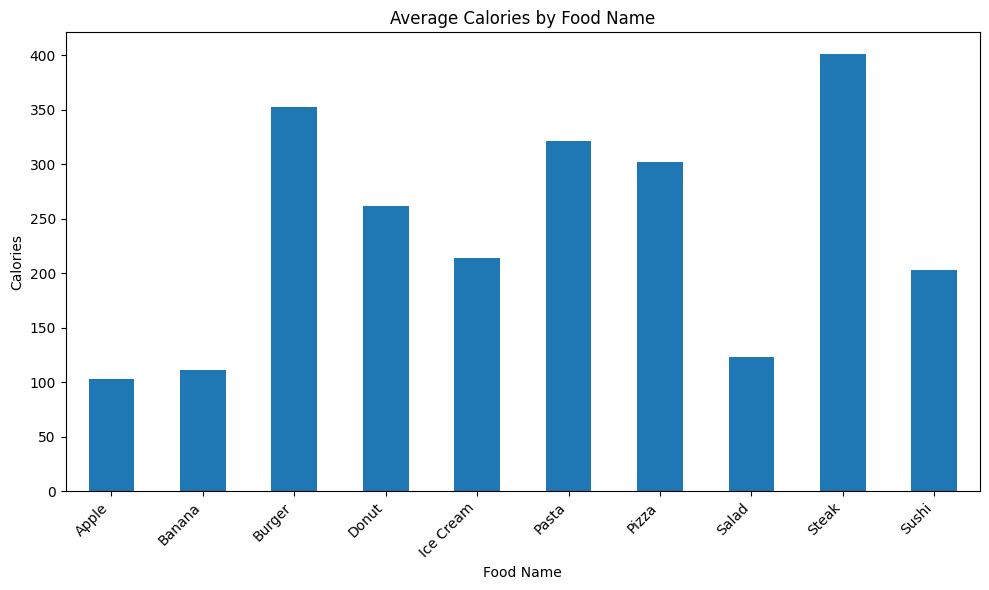

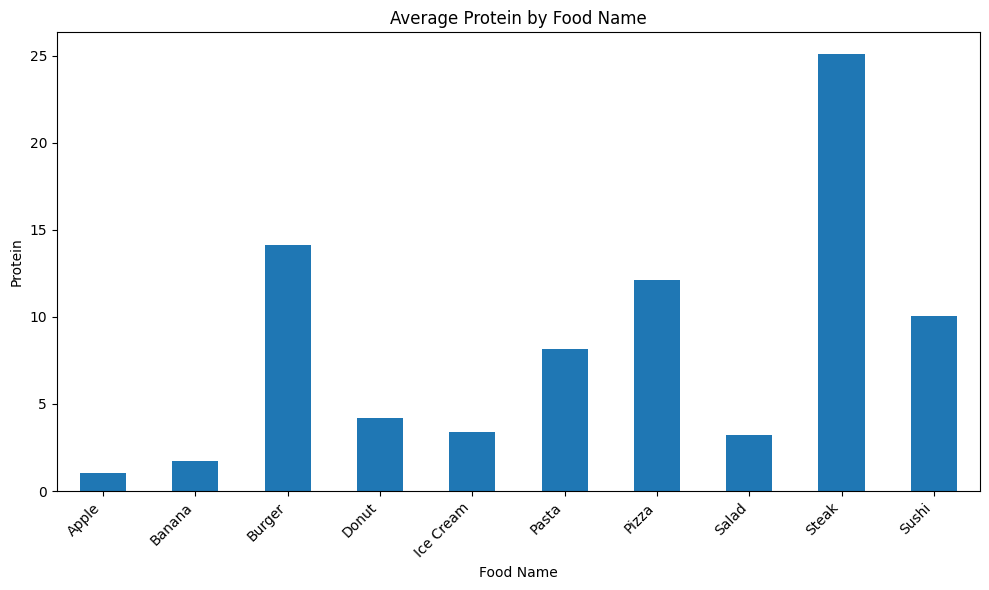

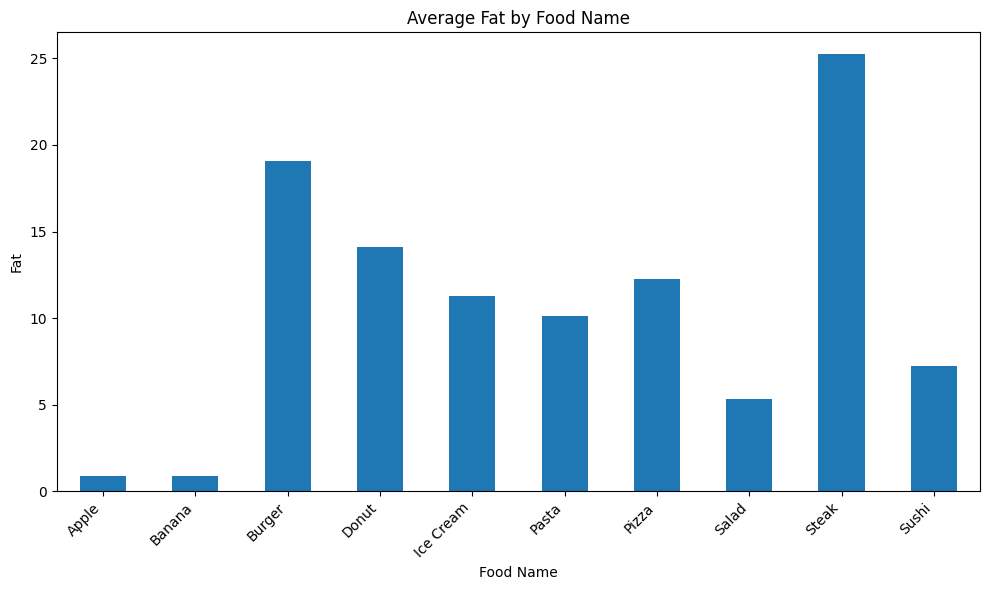

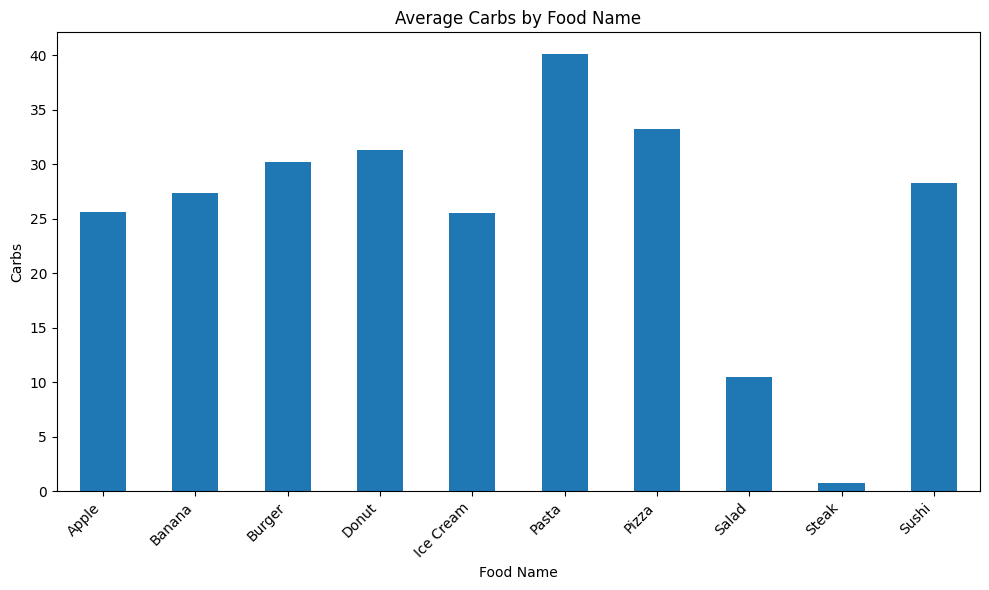

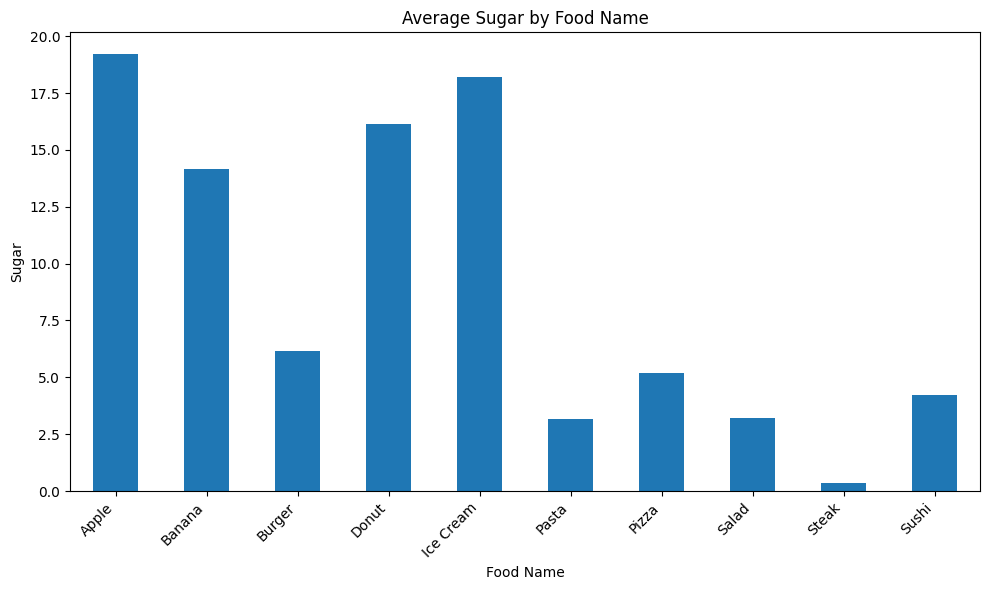

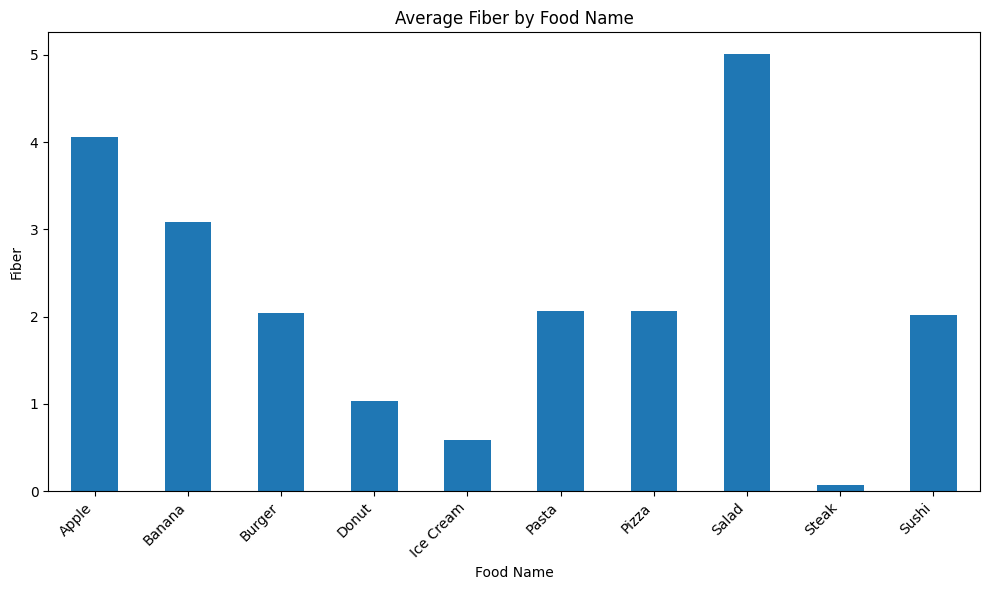

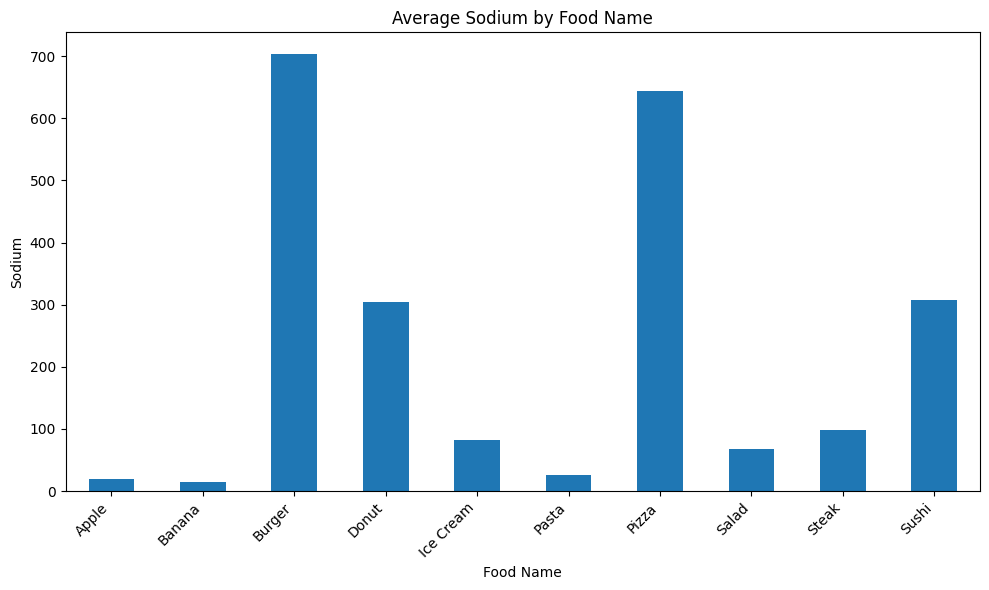

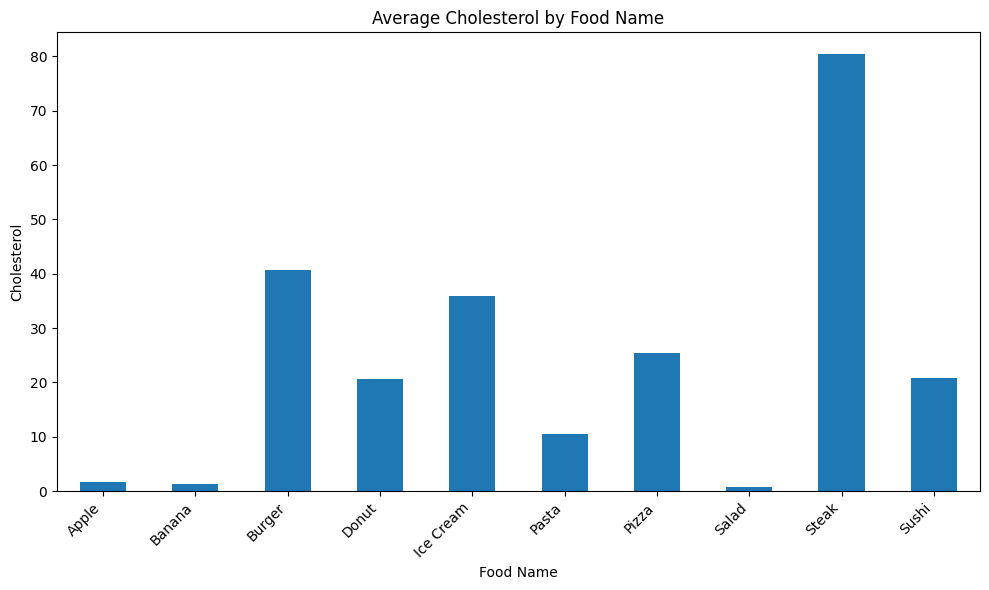

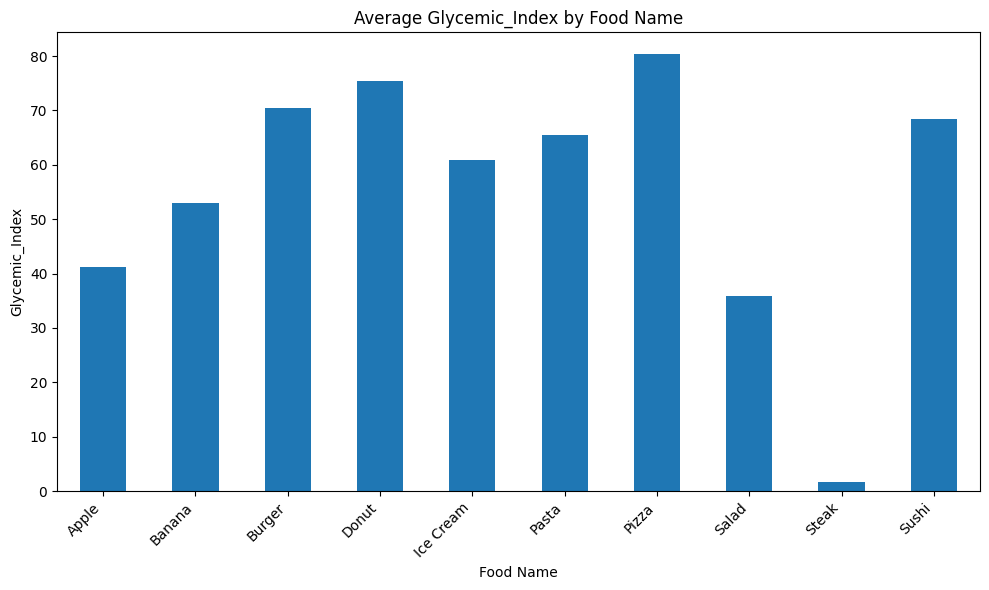

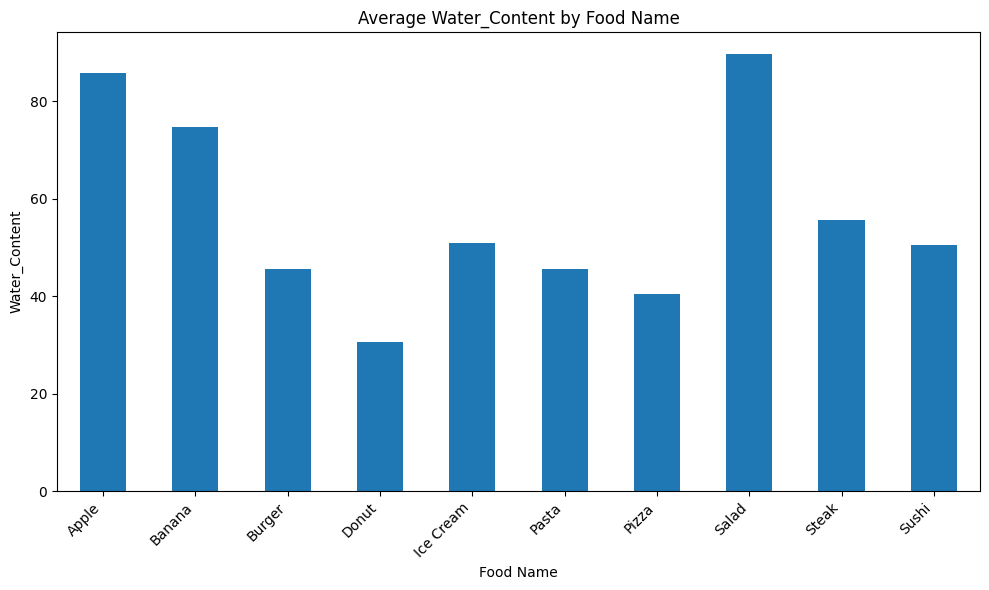

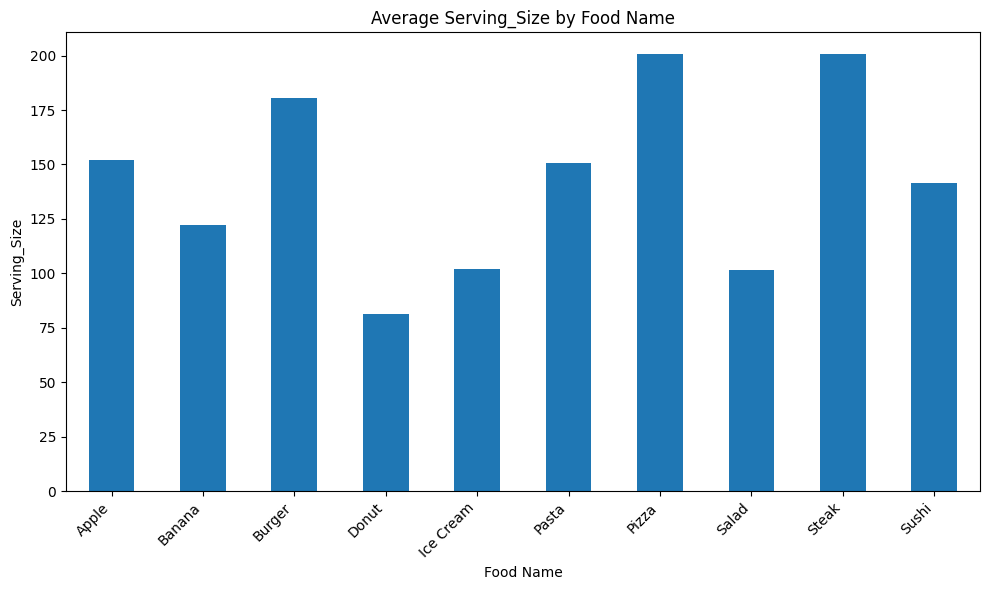

In [18]:
num_features = [
    "Calories", "Protein", "Fat", "Carbs", "Sugar",
    "Fiber", "Sodium", "Cholesterol",
    "Glycemic_Index", "Water_Content", "Serving_Size"
]

for feature in num_features:
    plt.figure(figsize=(10, 6))

    df.groupby("Food_Name")[feature].mean().plot(kind="bar")

    plt.title(f"Average {feature} by Food Name")
    plt.xlabel("Food Name")
    plt.ylabel(feature)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [19]:
X=df.drop(columns=[
    'Food_Name',
    'Meal_Type',
    'Preparation_Method',
    'Is_Vegan',
    'Is_Gluten_Free'
])
y=df['Food_Name']

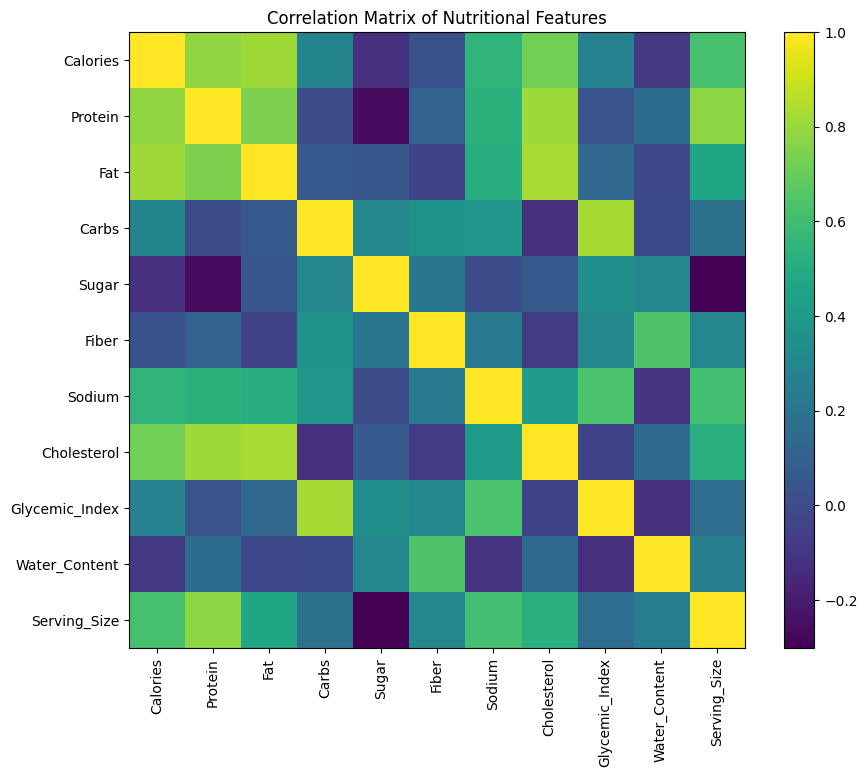

In [20]:
corr = X.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix of Nutritional Features")
plt.show()

In [21]:
le=LabelEncoder()
y= le.fit_transform(y)

In [22]:
y

array([6, 4, 2, ..., 6, 5, 4], shape=(31387,))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25109, 11), (6278, 11), (25109,), (6278,))

In [24]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
print("Classes:", le.classes_)

Classes: ['Apple' 'Banana' 'Burger' 'Donut' 'Ice Cream' 'Pasta' 'Pizza' 'Salad'
 'Steak' 'Sushi']


In [27]:
#LogisticRegression

lr = LogisticRegression(max_iter=1000,random_state=42)
lr.fit(X_train_scaled, y_train)

y_train_pred =lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9902425425146362
Testing Accuracy: 0.9907613889773813

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       297
           1       0.98      0.97      0.97       239
           2       0.99      0.98      0.99       988
           3       1.00      1.00      1.00       893
           4       1.00      1.00      1.00       594
           5       1.00      0.99      1.00       795
           6       0.98      0.99      0.99      1183
           7       1.00      0.99      1.00       199
           8       1.00      1.00      1.00       398
           9       0.97      1.00      0.98       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278

Confusion Matrix:

[[ 288    5    0    0    0    0    1    0    0    3]
 [   5  231    0    0    0    0    1    0    0    2]
 [   0    0  973

In [28]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10,random_state=42)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_test))

Training Accuracy: 0.9927914293679557
Testing Accuracy: 0.9858235106721885

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       1.00      0.97      0.98       239
           2       0.98      0.96      0.97       988
           3       1.00      1.00      1.00       893
           4       0.96      1.00      0.98       594
           5       1.00      0.99      1.00       795
           6       0.96      0.98      0.97      1183
           7       1.00      0.99      1.00       199
           8       1.00      1.00      1.00       398
           9       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278

Confusion Matrix:

[[ 293    0    0    0    3    0    1    0    0    0]
 [   5  231    0    0    2    0    1    0    0    0]
 [   0    0  950

In [29]:
#RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_test))

Training Accuracy: 0.9939862200804492
Testing Accuracy: 0.9926728257406817

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       297
           1       1.00      0.98      0.99       239
           2       0.99      0.99      0.99       988
           3       1.00      1.00      1.00       893
           4       0.96      1.00      0.98       594
           5       1.00      0.99      1.00       795
           6       0.98      0.99      0.99      1183
           7       1.00      0.99      1.00       199
           8       1.00      1.00      1.00       398
           9       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278

Confusion Matrix:

[[ 293    0    0    0    3    0    1    0    0    0]
 [   1  235    0    0    2    0    1    0    0    0]
 [   0    0  975

In [30]:
#K-Nearest Neighbors (KNN)
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_train_pred =knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9913975068700466
Testing Accuracy: 0.9923542529467984

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       297
           1       1.00      0.99      0.99       239
           2       0.97      0.99      0.98       988
           3       0.99      1.00      0.99       893
           4       1.00      1.00      1.00       594
           5       1.00      0.99      1.00       795
           6       0.99      0.99      0.99      1183
           7       1.00      0.99      1.00       199
           8       1.00      1.00      1.00       398
           9       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       1.00      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278

Confusion Matrix:

[[ 293    0    3    1    0    0    0    0    0    0]
 [   0  236    2    1    0    0    0    0    0    0]
 [   0    0  974

In [31]:
#SupportVectorMachine SVM
svm = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)

# Train
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = svm.predict(X_train_scaled)
y_pred_test = svm.predict(X_test_scaled)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_test))

Training Accuracy: 0.9919949022262934
Testing Accuracy: 0.9937878305192737

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       297
           1       1.00      0.99      0.99       239
           2       1.00      0.99      0.99       988
           3       1.00      1.00      1.00       893
           4       1.00      1.00      1.00       594
           5       1.00      0.99      1.00       795
           6       0.99      0.99      0.99      1183
           7       1.00      0.99      1.00       199
           8       1.00      1.00      1.00       398
           9       0.97      1.00      0.99       692

    accuracy                           0.99      6278
   macro avg       1.00      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278

Confusion Matrix:

[[ 293    0    0    0    0    0    1    0    0    3]
 [   0  236    0    0    0    0    1    0    0    2]
 [   0    0  977

In [32]:
#XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42,
                            use_label_encoder=False, eval_metric='mlogloss')

# Train
xgb.fit(X_train, y_train)

# Predictions
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_test))

Training Accuracy: 0.9939463937233661
Testing Accuracy: 0.9931506849315068

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       297
           1       1.00      0.97      0.99       239
           2       1.00      0.99      0.99       988
           3       1.00      1.00      1.00       893
           4       1.00      1.00      1.00       594
           5       0.98      0.99      0.99       795
           6       0.99      0.99      0.99      1183
           7       1.00      0.99      1.00       199
           8       1.00      1.00      1.00       398
           9       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278

Confusion Matrix:

[[ 293    0    0    0    0    3    1    0    0    0]
 [   3  233    0    0    0    2    1    0    0    0]
 [   0    0  976

In [33]:
#Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train
gb.fit(X_train, y_train)

# Predictions
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_test))

Training Accuracy: 0.9939862200804492
Testing Accuracy: 0.9923542529467984

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       297
           1       1.00      0.98      0.99       239
           2       0.99      0.99      0.99       988
           3       1.00      0.99      1.00       893
           4       0.96      1.00      0.98       594
           5       1.00      0.99      1.00       795
           6       0.98      0.99      0.99      1183
           7       1.00      0.99      1.00       199
           8       1.00      1.00      1.00       398
           9       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278

Confusion Matrix:

[[ 293    0    0    0    3    0    1    0    0    0]
 [   2  234    0    0    2    0    1    0    0    0]
 [   0    0  975

In [34]:
X

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474
...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098


In [35]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

Logistic Regression: Mean=0.9902, Std=0.0030
Decision Tree: Mean=0.9846, Std=0.0030
Random Forest: Mean=0.9910, Std=0.0031
KNN: Mean=0.9911, Std=0.0028
SVM: Mean=0.9919, Std=0.0033
XGBoost: Mean=0.9909, Std=0.0030
Gradient Boosting: Mean=0.9911, Std=0.0031


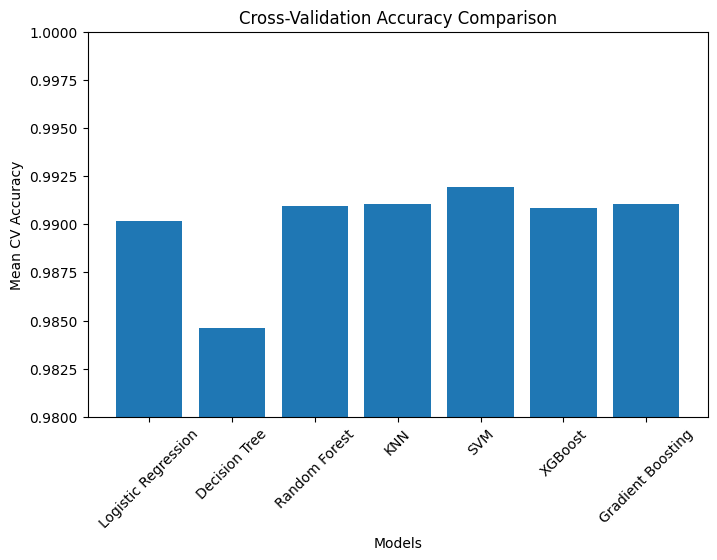

In [36]:
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "KNN": knn,
    "SVM": svm,
    "XGBoost": xgb,
    "Gradient Boosting": gb
}

model_names = []
cv_means = []

for name, model in models.items():
    cv_score = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name}: Mean={cv_score.mean():.4f}, Std={cv_score.std():.4f}")
    model_names.append(name)
    cv_means.append(cv_score.mean())

plt.figure(figsize=(8, 5))
plt.bar(model_names, cv_means)
plt.ylabel("Mean CV Accuracy")
plt.xlabel("Models")
plt.title("Cross-Validation Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0.98, 1.0)
plt.show()
